In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
simulation_data = pd.read_csv('simulation_kpi_results.csv')

# Replace infinite values with NaN
simulation_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
simulation_data_cleaned = simulation_data.dropna()

In [8]:
simulation_data_cleaned

,Method,Area Size,Number of Drones,Number of Users,Coverage,Average Signal Strength,Average Energy Consumption,Execution Time (s)
0,Random,20,10,50,50,-25.694103,100.0,0.000000
2,Greedy,20,10,50,50,-19.240239,100.0,0.014232
3,PSO,20,10,50,50,-24.222348,100.0,0.135219
4,DFO,20,10,50,50,-25.694103,100.0,0.207590
5,Random,20,10,100,100,-26.393235,100.0,0.000000
...,...,...,...,...,...,...,...,...
353,PSO,100,60,100,33,-38.075419,100.0,1.946363
354,DFO,100,60,100,70,-38.287652,100.0,37.367326
355,Random,100,60,150,128,-38.061156,100.0,0.000000
358,PSO,100,60,150,59,-37.339012,100.0,2.785677


In [2]:
simulation_data_cleaned.describe()

,Area Size,Number of Drones,Number of Users,Coverage,Average Signal Strength,Average Energy Consumption,Execution Time (s)
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.0,217.000000
mean,53.548387,33.133641,99.769585,82.589862,-30.112196,100.0,2.325395
std,32.143180,17.462808,40.965686,43.556184,6.298027,0.0,6.500121
min,20.000000,10.000000,50.000000,12.000000,-40.782786,100.0,0.000000
25%,30.000000,20.000000,50.000000,50.000000,-35.799147,100.0,0.018763
50%,50.000000,30.000000,100.000000,77.000000,-30.204165,100.0,0.299011
75%,100.000000,50.000000,150.000000,100.000000,-25.694103,100.0,1.560427
max,100.000000,60.000000,150.000000,150.000000,-15.813469,100.0,51.324568


In [3]:
simulation_data_cleaned.isnull().sum()

Method                        0
Area Size                     0
Number of Drones              0
Number of Users               0
Coverage                      0
Average Signal Strength       0
Average Energy Consumption    0
Execution Time (s)            0
dtype: int64

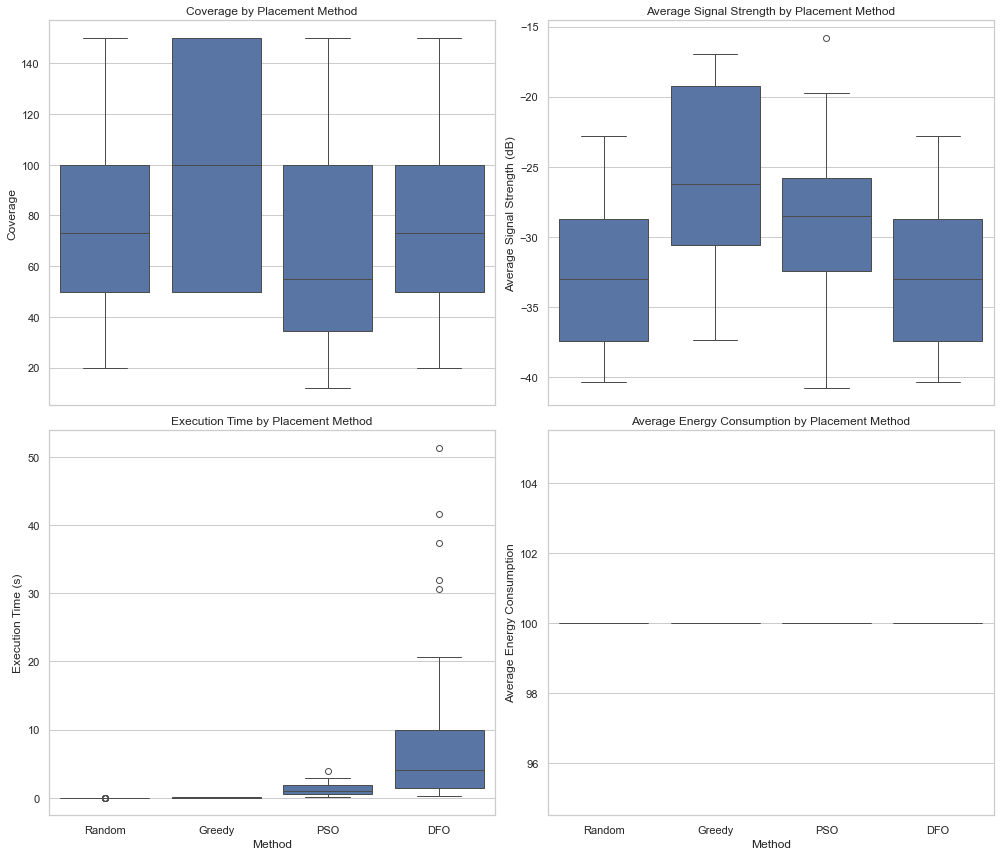

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualisation settings
sns.set(style="whitegrid")

# Create a figure to hold the subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharex=True)

# Plotting distribution of Coverage across methods
sns.boxplot(ax=axes[0, 0], data=simulation_data_cleaned, x='Method', y='Coverage')
axes[0, 0].set_title('Coverage by Placement Method')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Coverage')

# Plotting distribution of Average Signal Strength across methods
sns.boxplot(ax=axes[0, 1], data=simulation_data_cleaned, x='Method', y='Average Signal Strength')
axes[0, 1].set_title('Average Signal Strength by Placement Method')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Average Signal Strength (dB)')

# Plotting distribution of Execution Time across methods
sns.boxplot(ax=axes[1, 0], data=simulation_data_cleaned, x='Method', y='Execution Time (s)')
axes[1, 0].set_title('Execution Time by Placement Method')
axes[1, 0].set_xlabel('Method')
axes[1, 0].set_ylabel('Execution Time (s)')

# Plotting distribution of Average Energy Consumption across methods
sns.boxplot(ax=axes[1, 1], data=simulation_data_cleaned, x='Method', y='Average Energy Consumption')
axes[1, 1].set_title('Average Energy Consumption by Placement Method')
axes[1, 1].set_xlabel('Method')
axes[1, 1].set_ylabel('Average Energy Consumption')

plt.tight_layout()
plt.show()


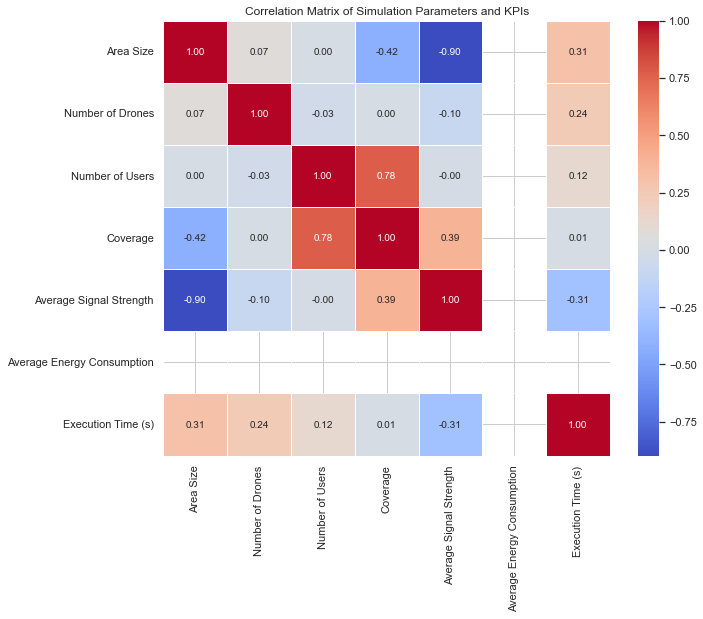

In [5]:
# Calculate correlation matrix
correlation_matrix = simulation_data_cleaned.select_dtypes(include=[float, int]).corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Simulation Parameters and KPIs')
plt.show()


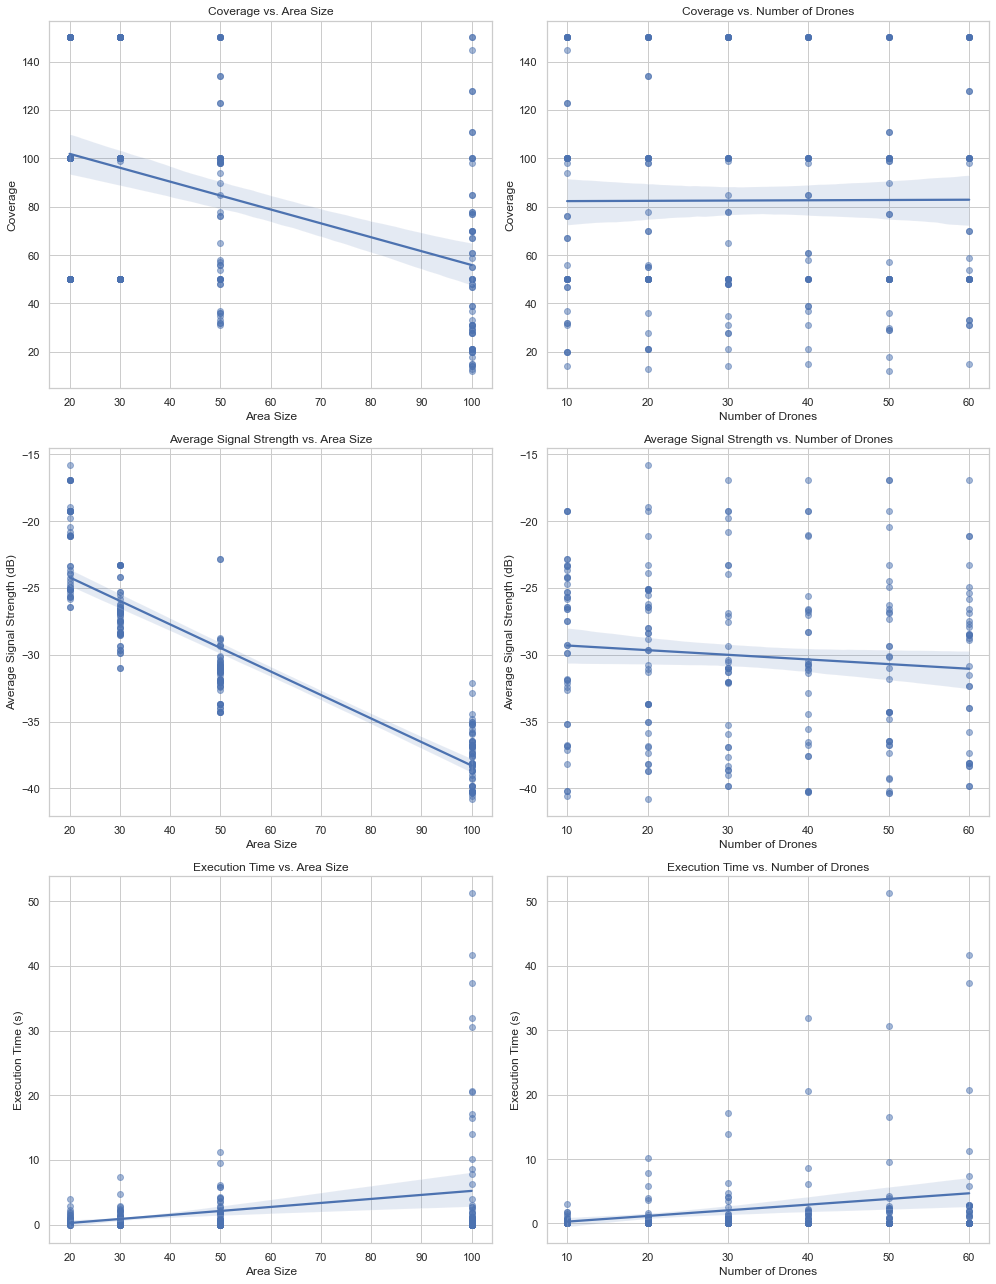

In [6]:
# Set up the visualisation settings
sns.set(style="whitegrid")

# Create a figure to hold the subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Regression plot for Coverage vs. Area Size
sns.regplot(ax=axes[0, 0], data=simulation_data_cleaned, x='Area Size', y='Coverage', scatter_kws={'alpha':0.5})
axes[0, 0].set_title('Coverage vs. Area Size')
axes[0, 0].set_xlabel('Area Size')
axes[0, 0].set_ylabel('Coverage')

# Regression plot for Coverage vs. Number of Drones
sns.regplot(ax=axes[0, 1], data=simulation_data_cleaned, x='Number of Drones', y='Coverage', scatter_kws={'alpha':0.5})
axes[0, 1].set_title('Coverage vs. Number of Drones')
axes[0, 1].set_xlabel('Number of Drones')
axes[0, 1].set_ylabel('Coverage')

# Regression plot for Average Signal Strength vs. Area Size
sns.regplot(ax=axes[1, 0], data=simulation_data_cleaned, x='Area Size', y='Average Signal Strength', scatter_kws={'alpha':0.5})
axes[1, 0].set_title('Average Signal Strength vs. Area Size')
axes[1, 0].set_xlabel('Area Size')
axes[1, 0].set_ylabel('Average Signal Strength (dB)')

# Regression plot for Average Signal Strength vs. Number of Drones
sns.regplot(ax=axes[1, 1], data=simulation_data_cleaned, x='Number of Drones', y='Average Signal Strength', scatter_kws={'alpha':0.5})
axes[1, 1].set_title('Average Signal Strength vs. Number of Drones')
axes[1, 1].set_xlabel('Number of Drones')
axes[1, 1].set_ylabel('Average Signal Strength (dB)')

# Regression plot for Execution Time vs. Area Size
sns.regplot(ax=axes[2, 0], data=simulation_data_cleaned, x='Area Size', y='Execution Time (s)', scatter_kws={'alpha':0.5})
axes[2, 0].set_title('Execution Time vs. Area Size')
axes[2, 0].set_xlabel('Area Size')
axes[2, 0].set_ylabel('Execution Time (s)')

# Regression plot for Execution Time vs. Number of Drones
sns.regplot(ax=axes[2, 1], data=simulation_data_cleaned, x='Number of Drones', y='Execution Time (s)', scatter_kws={'alpha':0.5})
axes[2, 1].set_title('Execution Time vs. Number of Drones')
axes[2, 1].set_xlabel('Number of Drones')
axes[2, 1].set_ylabel('Execution Time (s)')

plt.tight_layout()
plt.show()


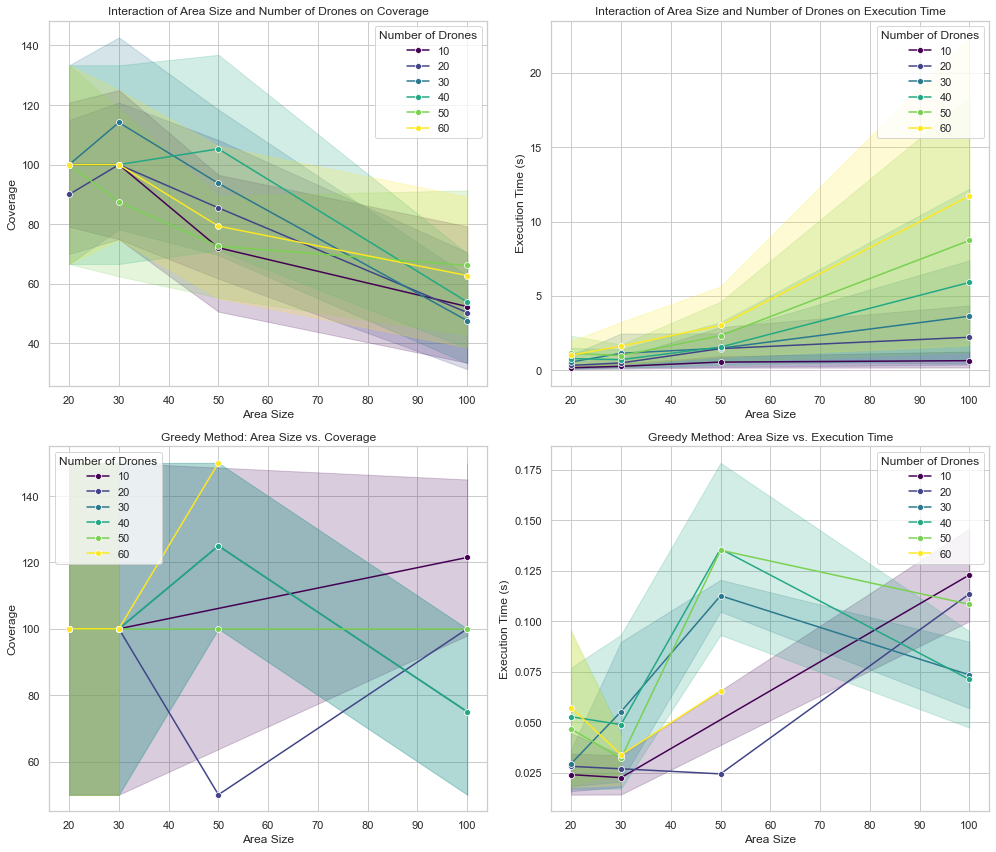

In [7]:
# Set up the figure for interaction plots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Interaction plot for Coverage vs. Area Size and Number of Drones
sns.lineplot(ax=axes[0, 0], data=simulation_data_cleaned, x='Area Size', y='Coverage', hue='Number of Drones', palette='viridis', marker='o')
axes[0, 0].set_title('Interaction of Area Size and Number of Drones on Coverage')
axes[0, 0].set_xlabel('Area Size')
axes[0, 0].set_ylabel('Coverage')

# Interaction plot for Execution Time vs. Area Size and Number of Drones
sns.lineplot(ax=axes[0, 1], data=simulation_data_cleaned, x='Area Size', y='Execution Time (s)', hue='Number of Drones', palette='viridis', marker='o')
axes[0, 1].set_title('Interaction of Area Size and Number of Drones on Execution Time')
axes[0, 1].set_xlabel('Area Size')
axes[0, 1].set_ylabel('Execution Time (s)')

# Filtering data for a specific method to highlight differences
specific_method_data = simulation_data_cleaned[simulation_data_cleaned['Method'] == 'Greedy']

# Interaction plot for Coverage vs. Area Size and Number of Drones for a specific method
sns.lineplot(ax=axes[1, 0], data=specific_method_data, x='Area Size', y='Coverage', hue='Number of Drones', palette='viridis', marker='o')
axes[1, 0].set_title('Greedy Method: Area Size vs. Coverage')
axes[1, 0].set_xlabel('Area Size')
axes[1, 0].set_ylabel('Coverage')

# Interaction plot for Execution Time vs. Area Size and Number of Drones for a specific method
sns.lineplot(ax=axes[1, 1], data=specific_method_data, x='Area Size', y='Execution Time (s)', hue='Number of Drones', palette='viridis', marker='o')
axes[1, 1].set_title('Greedy Method: Area Size vs. Execution Time')
axes[1, 1].set_xlabel('Area Size')
axes[1, 1].set_ylabel('Execution Time (s)')

plt.tight_layout()
plt.show()
